---
# COM4402 INTRODUCCIÓN A LA INTELIGENCIA ARTIFICIAL - PROYECTO FINAL
---


- INTEGRANTES: KEVIN FUENTES N. Y JOSÉ SALGADO M.
- DOCENTE: HABRIEL CABAS M.
- AYUDANTE: NAIRO TORRES F.

---
## PARTE 1 - CARGA DE ARCHIVOS Y ANÁLISIS EXPLORATORIO DE DATOS
---

In [1]:
# CARGAMOS LAS LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# CARGAMOS EL DATAFRAME Y VISUALIZAMOS PRIMERAS FILAS
df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
# OBTENER CANTIDAD DE FILAS Y DE COLUMNAS
print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')

Cantidad de filas: 2499
Cantidad de columnas: 13


In [4]:
# OBTENER EL TIPO DE DATOS DEL DATASET
df.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [5]:
# VERIFICAR EXISTENCIA DE VALORES NULOS
df.isnull().sum().any()

False

In [6]:
# OBTENER ESTADÍSTICAS BÁSICAS
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [7]:
# CHEKEAMOS CANTIDAD DE VALORES ÚNICOS POR CADA ATRIBUTO
for column in df.select_dtypes(include='object').columns:
    print(f'{column}: {df[column].nunique()} valores únicos')

brand: 28 valores únicos
model: 127 valores únicos
title_status: 2 valores únicos
color: 49 valores únicos
vin: 2495 valores únicos
state: 44 valores únicos
country: 2 valores únicos
condition: 47 valores únicos


<function matplotlib.pyplot.show(close=None, block=None)>

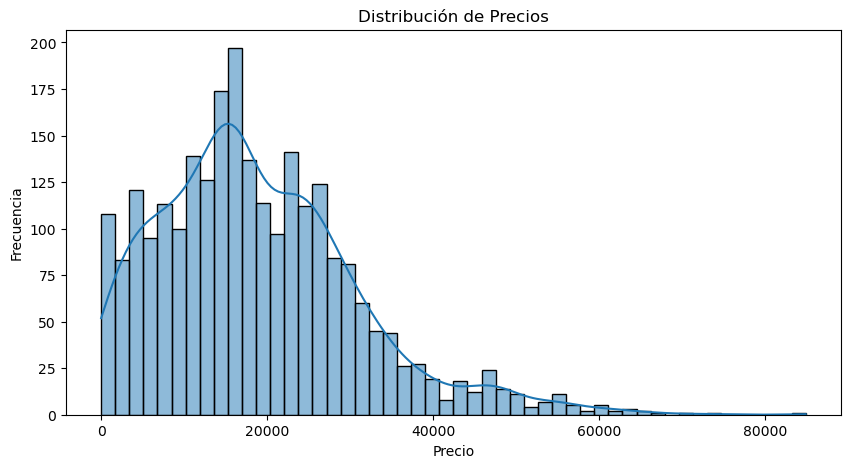

In [8]:
# GRAFICAMOS HISTOGRAMA DE FRECUENCIA DE PRECIOS
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price', bins=50, kde=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')
plt.show

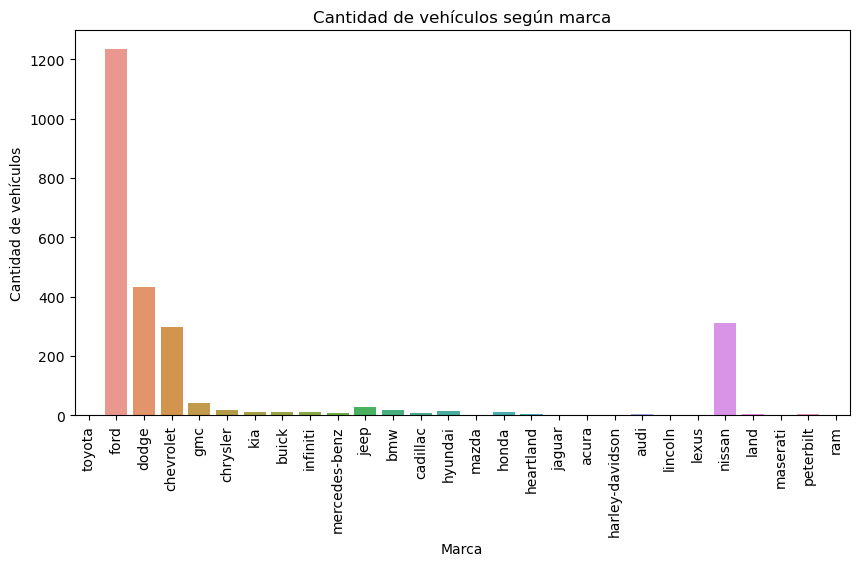

In [9]:
# GRAFICAMOS LA CANTIDAD DE VEHÍCULOS SEGÚN LA MARCA
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='brand')
plt.xlabel('Marca')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehículos según marca')
plt.show()

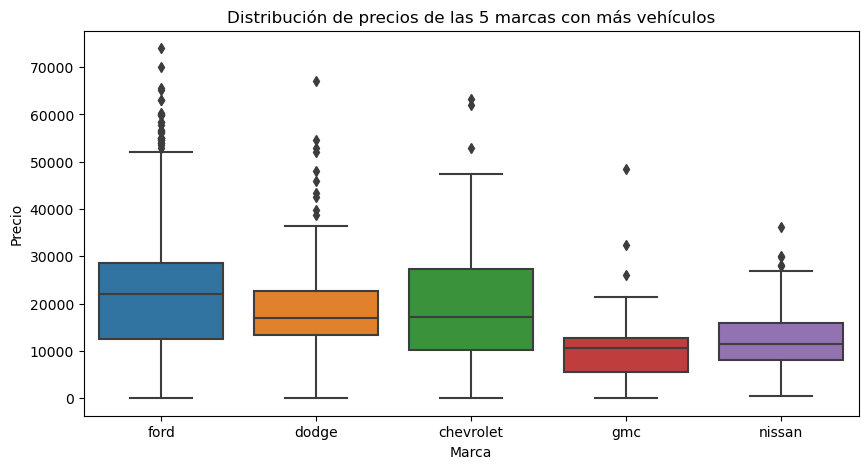

In [10]:
# GRAFICAMOS LA DISTRIBUCIÓN DE PRECIOS DE LAS 5 MARCAS CON MÁS VEHÍCULOS
top_brands = df['brand'].value_counts().nlargest(5).index
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['brand'].isin(top_brands)], x='brand', y='price')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.title('Distribución de precios de las 5 marcas con más vehículos')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

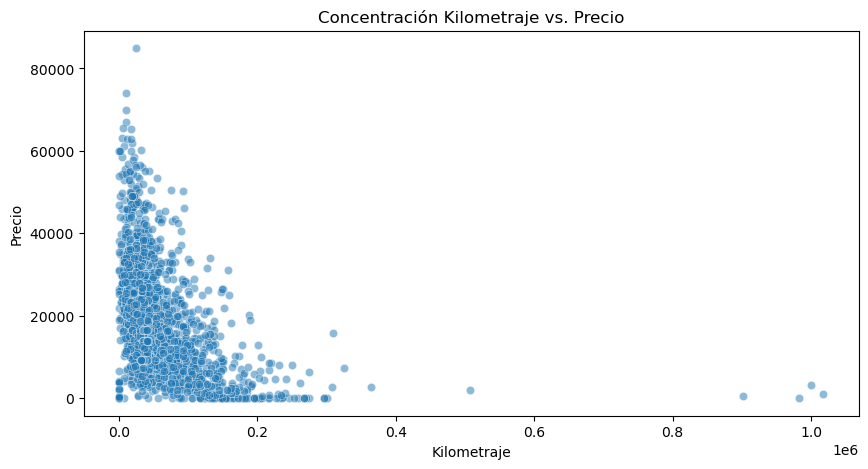

In [12]:
# GRAFICAMOS LA CONCENTRACIÓN DE KILOMETRAJE VS. PRECIO
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5)
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.title('Concentración Kilometraje vs. Precio')
plt.show

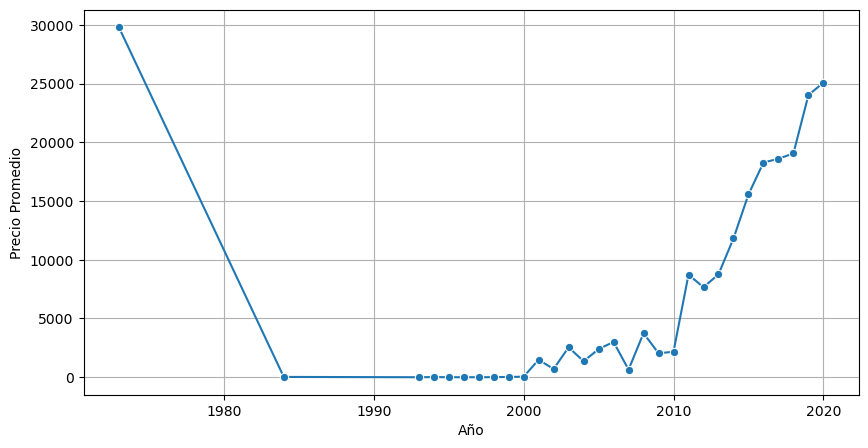

In [55]:
# GRAFICAMOS EL PRECIO PROMEDIO A LO LARGO DE LOS AÑOS
price_by_year = df.groupby('year')['price'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=price_by_year, x='year', y='price', marker='o')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()

---
## PARTE 2 - PREPROCESAMIENTO DE DATOS Y REDUCCIÓN DE DIMENSIONALIDAD
---

In [13]:
# ELIMINAMOS COLUMNAS IRRELEVANTES
df = df.drop(columns=['Unnamed: 0', 'title_status', 'color', 'vin', 'lot', 'country', 'condition'])
print("PRIMERAS FILAS TRAS ELIMINACIÓN DE ATRIBUTOS IRRELEVANTES")
df.head()

PRIMERAS FILAS TRAS ELIMINACIÓN DE ATRIBUTOS IRRELEVANTES


,price,brand,model,year,mileage,state
0,6300,toyota,cruiser,2008,274117.0,new jersey
1,2899,ford,se,2011,190552.0,tennessee
2,5350,dodge,mpv,2018,39590.0,georgia
3,25000,ford,door,2014,64146.0,virginia
4,27700,chevrolet,1500,2018,6654.0,florida


In [14]:
# IDENTIFICAMOS VARIABLES CATEGÓRICAS QUE REQUIEREN CODIFICACIÓN
cat_cols = ['brand', 'model', 'state']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    
df.head()

,price,brand,model,year,mileage,state
0,6300,27,25,2008,274117.0,24
1,2899,8,92,2011,190552.0,35
2,5350,7,75,2018,39590.0,7
3,25000,8,32,2014,64146.0,39
4,27700,5,0,2018,6654.0,6


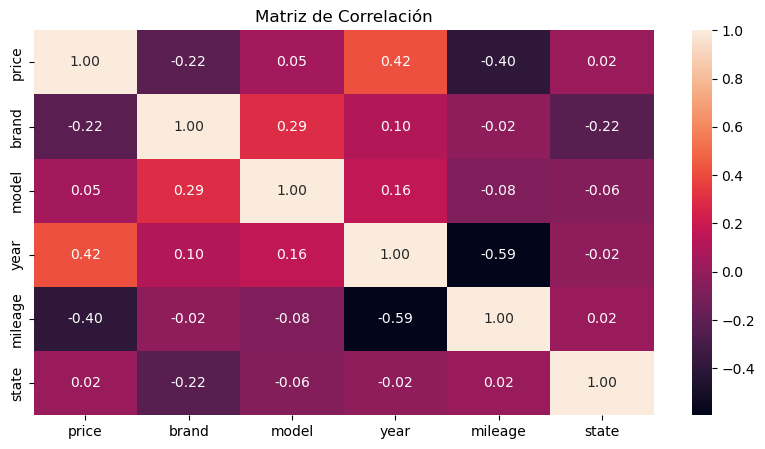

In [15]:
# CALCULAMOS MATRIZ DE CORRELACIÓN
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [16]:
# SEPARAMOS LAS VARIABLE OBJETIVO DEL DATAFRAME
x = df.drop(columns=['price'])
y = df['price']

In [18]:
# ESTANDARIZAMOS EL DATAFRAME
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

---
## PARTE 3 - ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
---

In [19]:
# SEPARAMOS LAS VARIABLES EN ENTRENAMIENTO Y TESTETO
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [20]:
# CREAMOS FUNCIÓN PARA EVALUAR MODELOS DE REGRESIÓN
def evaluate_model(model, x_test, y_test, model_name='Modelo'):
    """
    Evalúa un modelo de regresión y muestra métricas clave.

    Argumentos:
        model: El modelo de regresión entrenado.
        x_test: El conjunto de datos de testeo.
        y_test: Las etiquetas reales del conjunto de testeo.
        model_name: Nombre descriptivo para el modelo, usado para los outputs
    """

    y_pred = model.predict(x_test)

    results = {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    }

    print(f'\n--- Evaluación de {model_name} ---')
    for metric, value in results.items():
        print(f'{metric}: {value:.4f}')

    plt.figure(figsize=(10,5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel("Valor Real")
    plt.ylabel("Predicción")
    plt.title(f"{model_name} - Real vs. Predcción")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


--- Evaluación de Linear Regression ---
MSE: 111986607.9327
MAE: 7850.0376
R2 Score: 0.2934


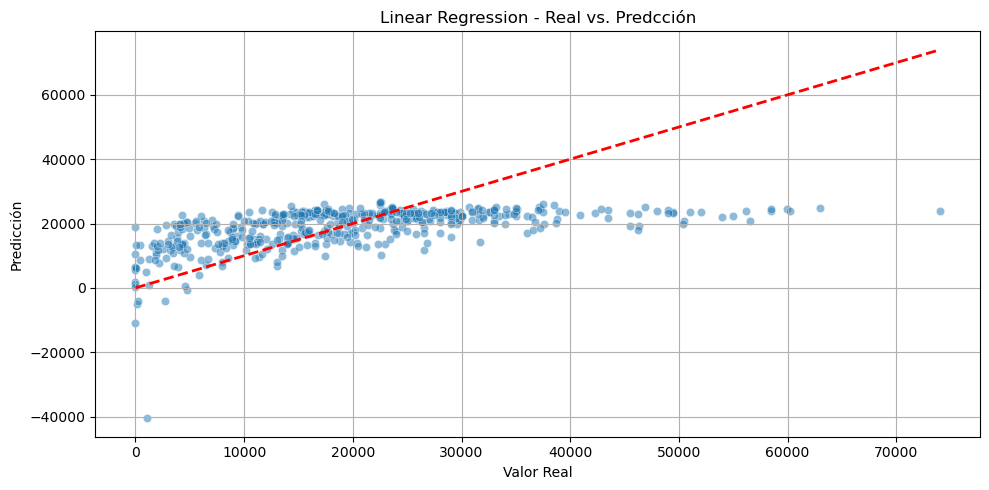

In [21]:
# IMPLEMENTAMOS MODELO LINEAR REGRESSION Y EVALUAMOS
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

lr_results = evaluate_model(lr_model, x_test, y_test, 'Linear Regression')


--- Evaluación de Random Forest Regressor ---
MSE: 49937531.5884
MAE: 4552.4240
R2 Score: 0.6849


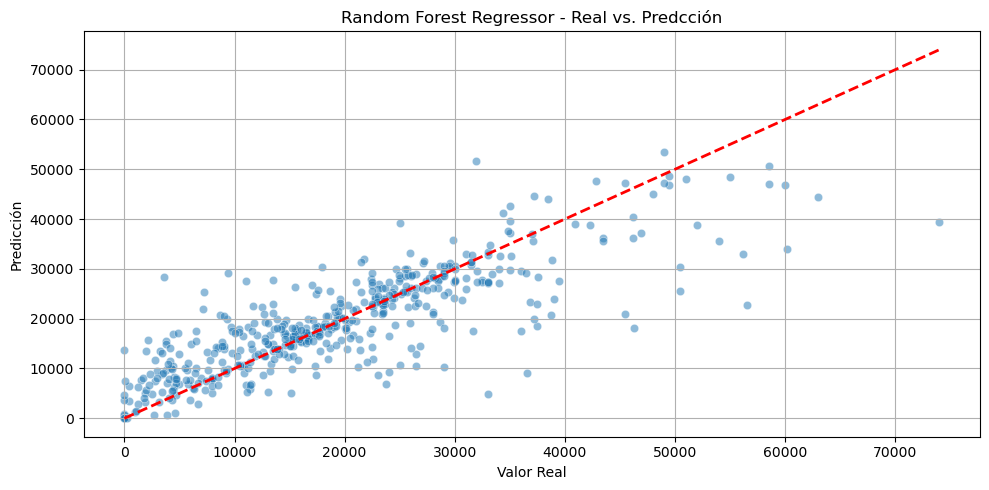

In [22]:
# ENTRENAMOS MODELO RANDOM FOREST REGRESSOR Y EVALUAMOS
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(x_train, y_train)

rfr_results = evaluate_model(rfr_model, x_test, y_test, 'Random Forest Regressor')


--- Evaluación de KNN Regressor ---
MSE: 66550004.2482
MAE: 5508.6904
R2 Score: 0.5801


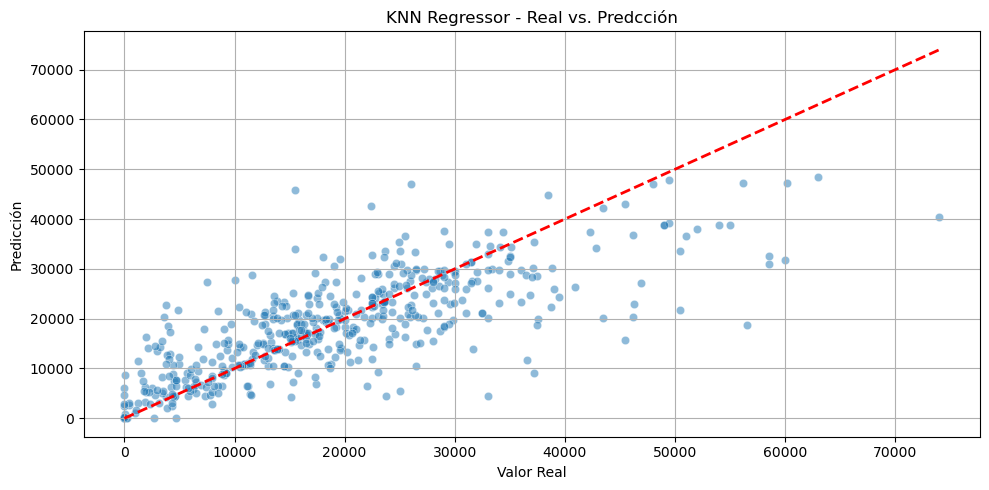

In [23]:
# ENTRENAMOS MODELO KNN REGRESSOR Y EVALUAMOS
knnr_model = KNeighborsRegressor(n_neighbors=5)
knnr_model.fit(x_train, y_train)

knnr_results = evaluate_model(knnr_model, x_test, y_test, 'KNN Regressor')

In [ ]:
# REVISAR LOS SIGUIENTES BLOQUES:

In [24]:
#  CREAMOS UN DICCIONARIO DE RESULTADOS.

# CREAMOS UN DICCIONARIO DE RESULTADOS
resultados = {
    "Modelo": [],
    "MSE": [],
    "MAE": [],
    "R²": []
}

# CREAMOS UN DICCIONARIO PARA LOS ERRORES
errores_modelos = {}

In [25]:
# APLICAMOS LOS MODELOS DE REGRESIÓN LINEAL, RANDOMFOREST REGRESSOR Y KNN REGRESSOR.

modelos = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

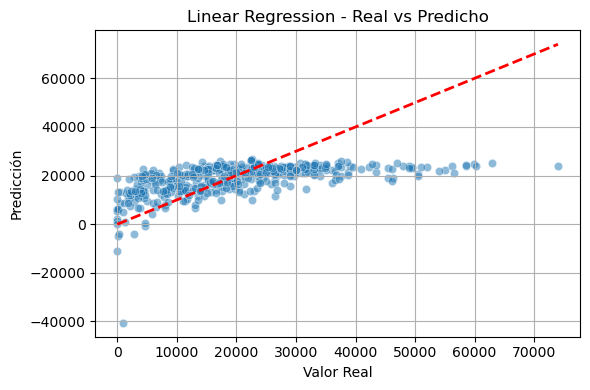

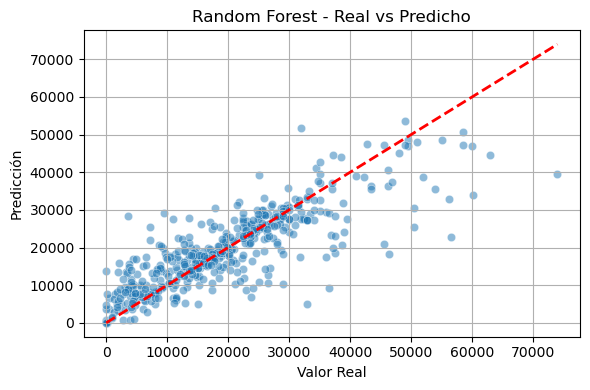

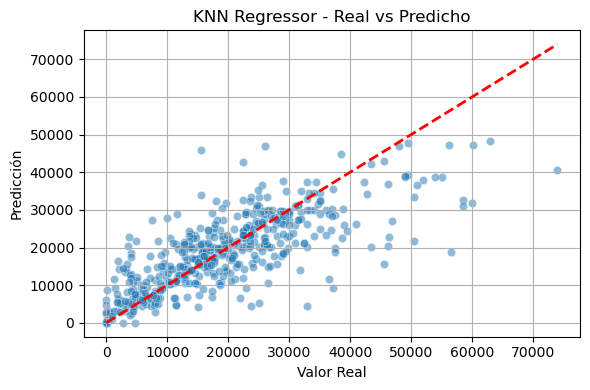

In [28]:
# REALIZAMOS ENTRENAMIENTO, PREDICCIÓN Y EVALUACIÓN. 

for nombre, modelo in modelos.items():
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)

# APLICAMOS METRICAS DE MSE, MAE Y R2.
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

# GUARDAMOS LOS RESULTADOS DE LAS METRICAS.
    resultados["Modelo"].append(nombre)
    resultados["MSE"].append(mse)
    resultados["MAE"].append(mae)
    resultados["R²"].append(r2)

# REGISTRAMOS LOS ERRORES.

    errores_modelos[nombre] = y_test - y_pred

# CREAMOS LOS LOS GRAFICOS PARA ANALIZAR LOS 3 MODELOS. 

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel("Valor Real")
    plt.ylabel("Predicción")
    plt.title(f"{nombre} - Real vs Predicho")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [29]:
# CREAMOS UN DATAFRAME CON LOS RESULTADOS OBTENIDOS.

df_resultados = pd.DataFrame(resultados)

# VISUALIZAMOS LAS METRICAS.
print("METRICAS DE COMPARACIÓN:")
display(df_resultados)

METRICAS DE COMPARACIÓN:


,Modelo,MSE,MAE,R²
0,Linear Regression,1.119866e+08,7850.03758,0.293429
1,Random Forest,4.993753e+07,4552.42402,0.684923
2,KNN Regressor,6.655000e+07,5508.69040,0.580108


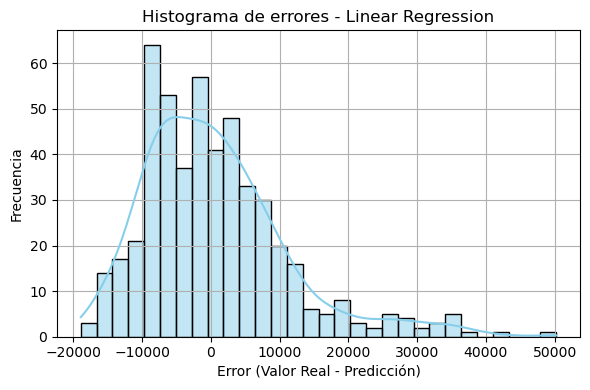

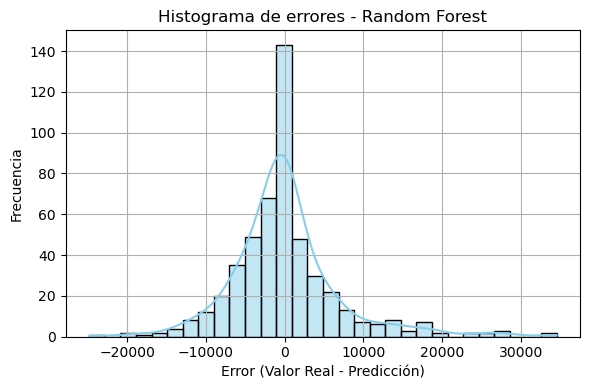

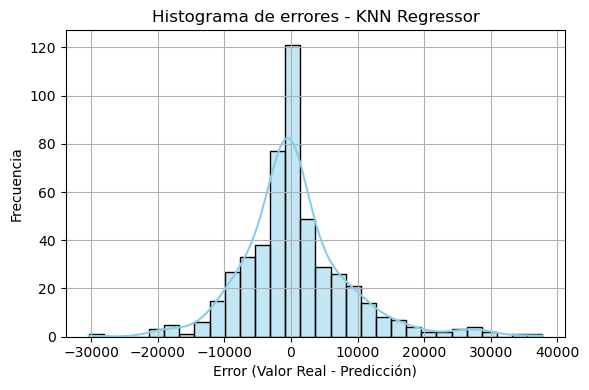

In [30]:
# GRAFICAMOS HISTOGRAMAS DE ERRORES PARA CADA MODELO

for nombre, errores in errores_modelos.items():
    plt.figure(figsize=(6, 4))
    sns.histplot(errores, bins=30, kde=True, color="skyblue")
    plt.title(f"Histograma de errores - {nombre}")
    plt.xlabel("Error (Valor Real - Predicción)")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

---
## PARTE 4 - COMPARACIÓN FINAL DE MODELOS Y CONCLUSIÓN
---

In [ ]:
# REVISAR LOS SIGUIENTES BLOQUES

In [31]:
# TABLA COMPARATIVA DE LOS MODELOS.

df_resultados = df_resultados.drop_duplicates(subset='Modelo')
display(df_resultados)

,Modelo,MSE,MAE,R²
0,Linear Regression,1.119866e+08,7850.03758,0.293429
1,Random Forest,4.993753e+07,4552.42402,0.684923
2,KNN Regressor,6.655000e+07,5508.69040,0.580108


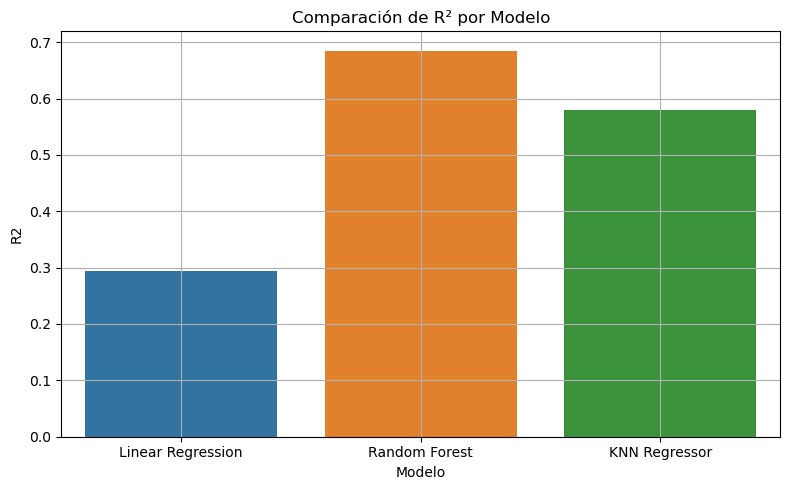

In [32]:
#CREAMOS UN GRAFICO COMPARATIVO DE LOS MODELOS EN LA METRICA R2.

df_resultados['R²'] = pd.to_numeric(df_resultados['R²'], errors='coerce')

plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='R²', data=df_resultados)
plt.title('Comparación de R² por Modelo')
plt.ylabel('R2')
plt.xlabel('Modelo')
plt.grid(True)
plt.tight_layout()
plt.show()

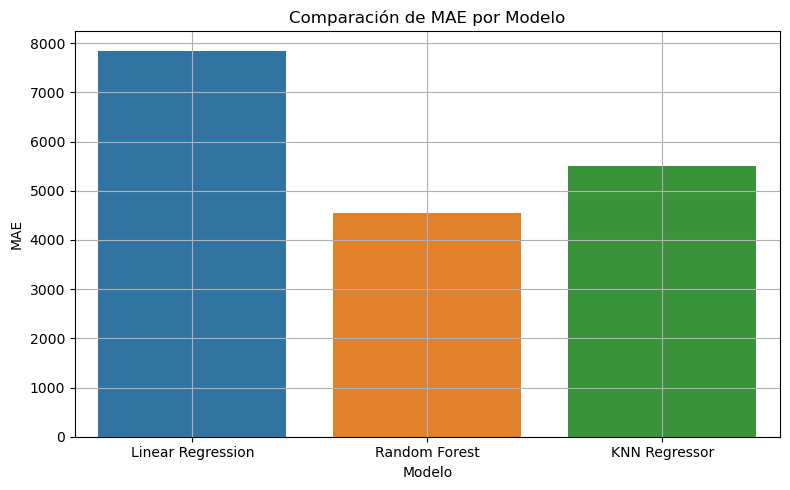

In [33]:
#CREAMOS UN GRAFICO COMPARATIVO DE LOS MODELOS EN LA METRICA MAE.

df_resultados['MAE'] = pd.to_numeric(df_resultados['MAE'], errors='coerce')

plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='MAE', data=df_resultados)
plt.title('Comparación de MAE por Modelo')
plt.ylabel('MAE')
plt.xlabel('Modelo')
plt.grid(True)
plt.tight_layout()
plt.show()

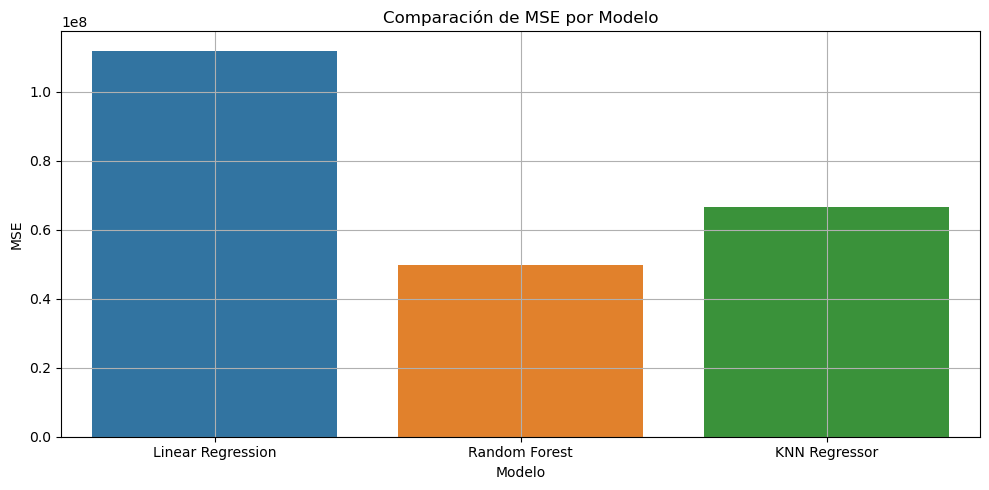

In [34]:
##CREAMOS UN GRAFICO COMPARATIVO DE LOS MODELOS EN LA METRICA MSE.

df_resultados['MSE'] = pd.to_numeric(df_resultados['MSE'], errors='coerce')

plt.figure(figsize=(10, 5))
sns.barplot(x='Modelo', y='MSE', data=df_resultados)
plt.title('Comparación de MSE por Modelo')
plt.ylabel('MSE')
plt.xlabel('Modelo')
plt.grid(True)
plt.tight_layout()
plt.show()